In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
import os
import pickle
import pandas as pd

In [2]:
real_datasets = ["annthyroid", "cardio", "glass", "ionosphere", "pendigits", "pima", "shuttle", "wine"]
synt_datasets = ["Xaxis", "bisect", "bisect_3d_skewed", "bisect_6d"]

In [3]:
models = ["AnomalyAutoencoder", "DIF", "ECOD", "EIF", "EIF+", "IF"]

In [10]:
results = []

In [23]:
rep_path = "/Users/alessio/Documents/ExIFFI-1/experiments/results"
for dataset in real_datasets+synt_datasets:
    for model in models:
        path = rep_path + "/" + dataset + "/" + "experiments/contamination" + "/" + model + "/"
        try:
            file = os.listdir(path)[-1]
        except:
            continue
        data = pickle.load(open(path + file, "rb"))
        means = np.array([np.mean(x) for x in data[0]])
        stds = np.array([np.std(x) for x in data[0]])
        results.append((dataset, model, means, stds))
        

/var/folders/m5/gwy76h051b78cmrncgncqv880000gp/T/ipykernel_35611/874304032.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), rotation=90)
/var/folders/m5/gwy76h051b78cmrncgncqv880000gp/T/ipykernel_35611/874304032.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), rotation=90)
/var/folders/m5/gwy76h051b78cmrncgncqv880000gp/T/ipykernel_35611/874304032.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), rotation=90)
/var/folders/m5/gwy76h051b78cmrncgncqv880000gp/T/ipykernel_35611/874304032.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.se

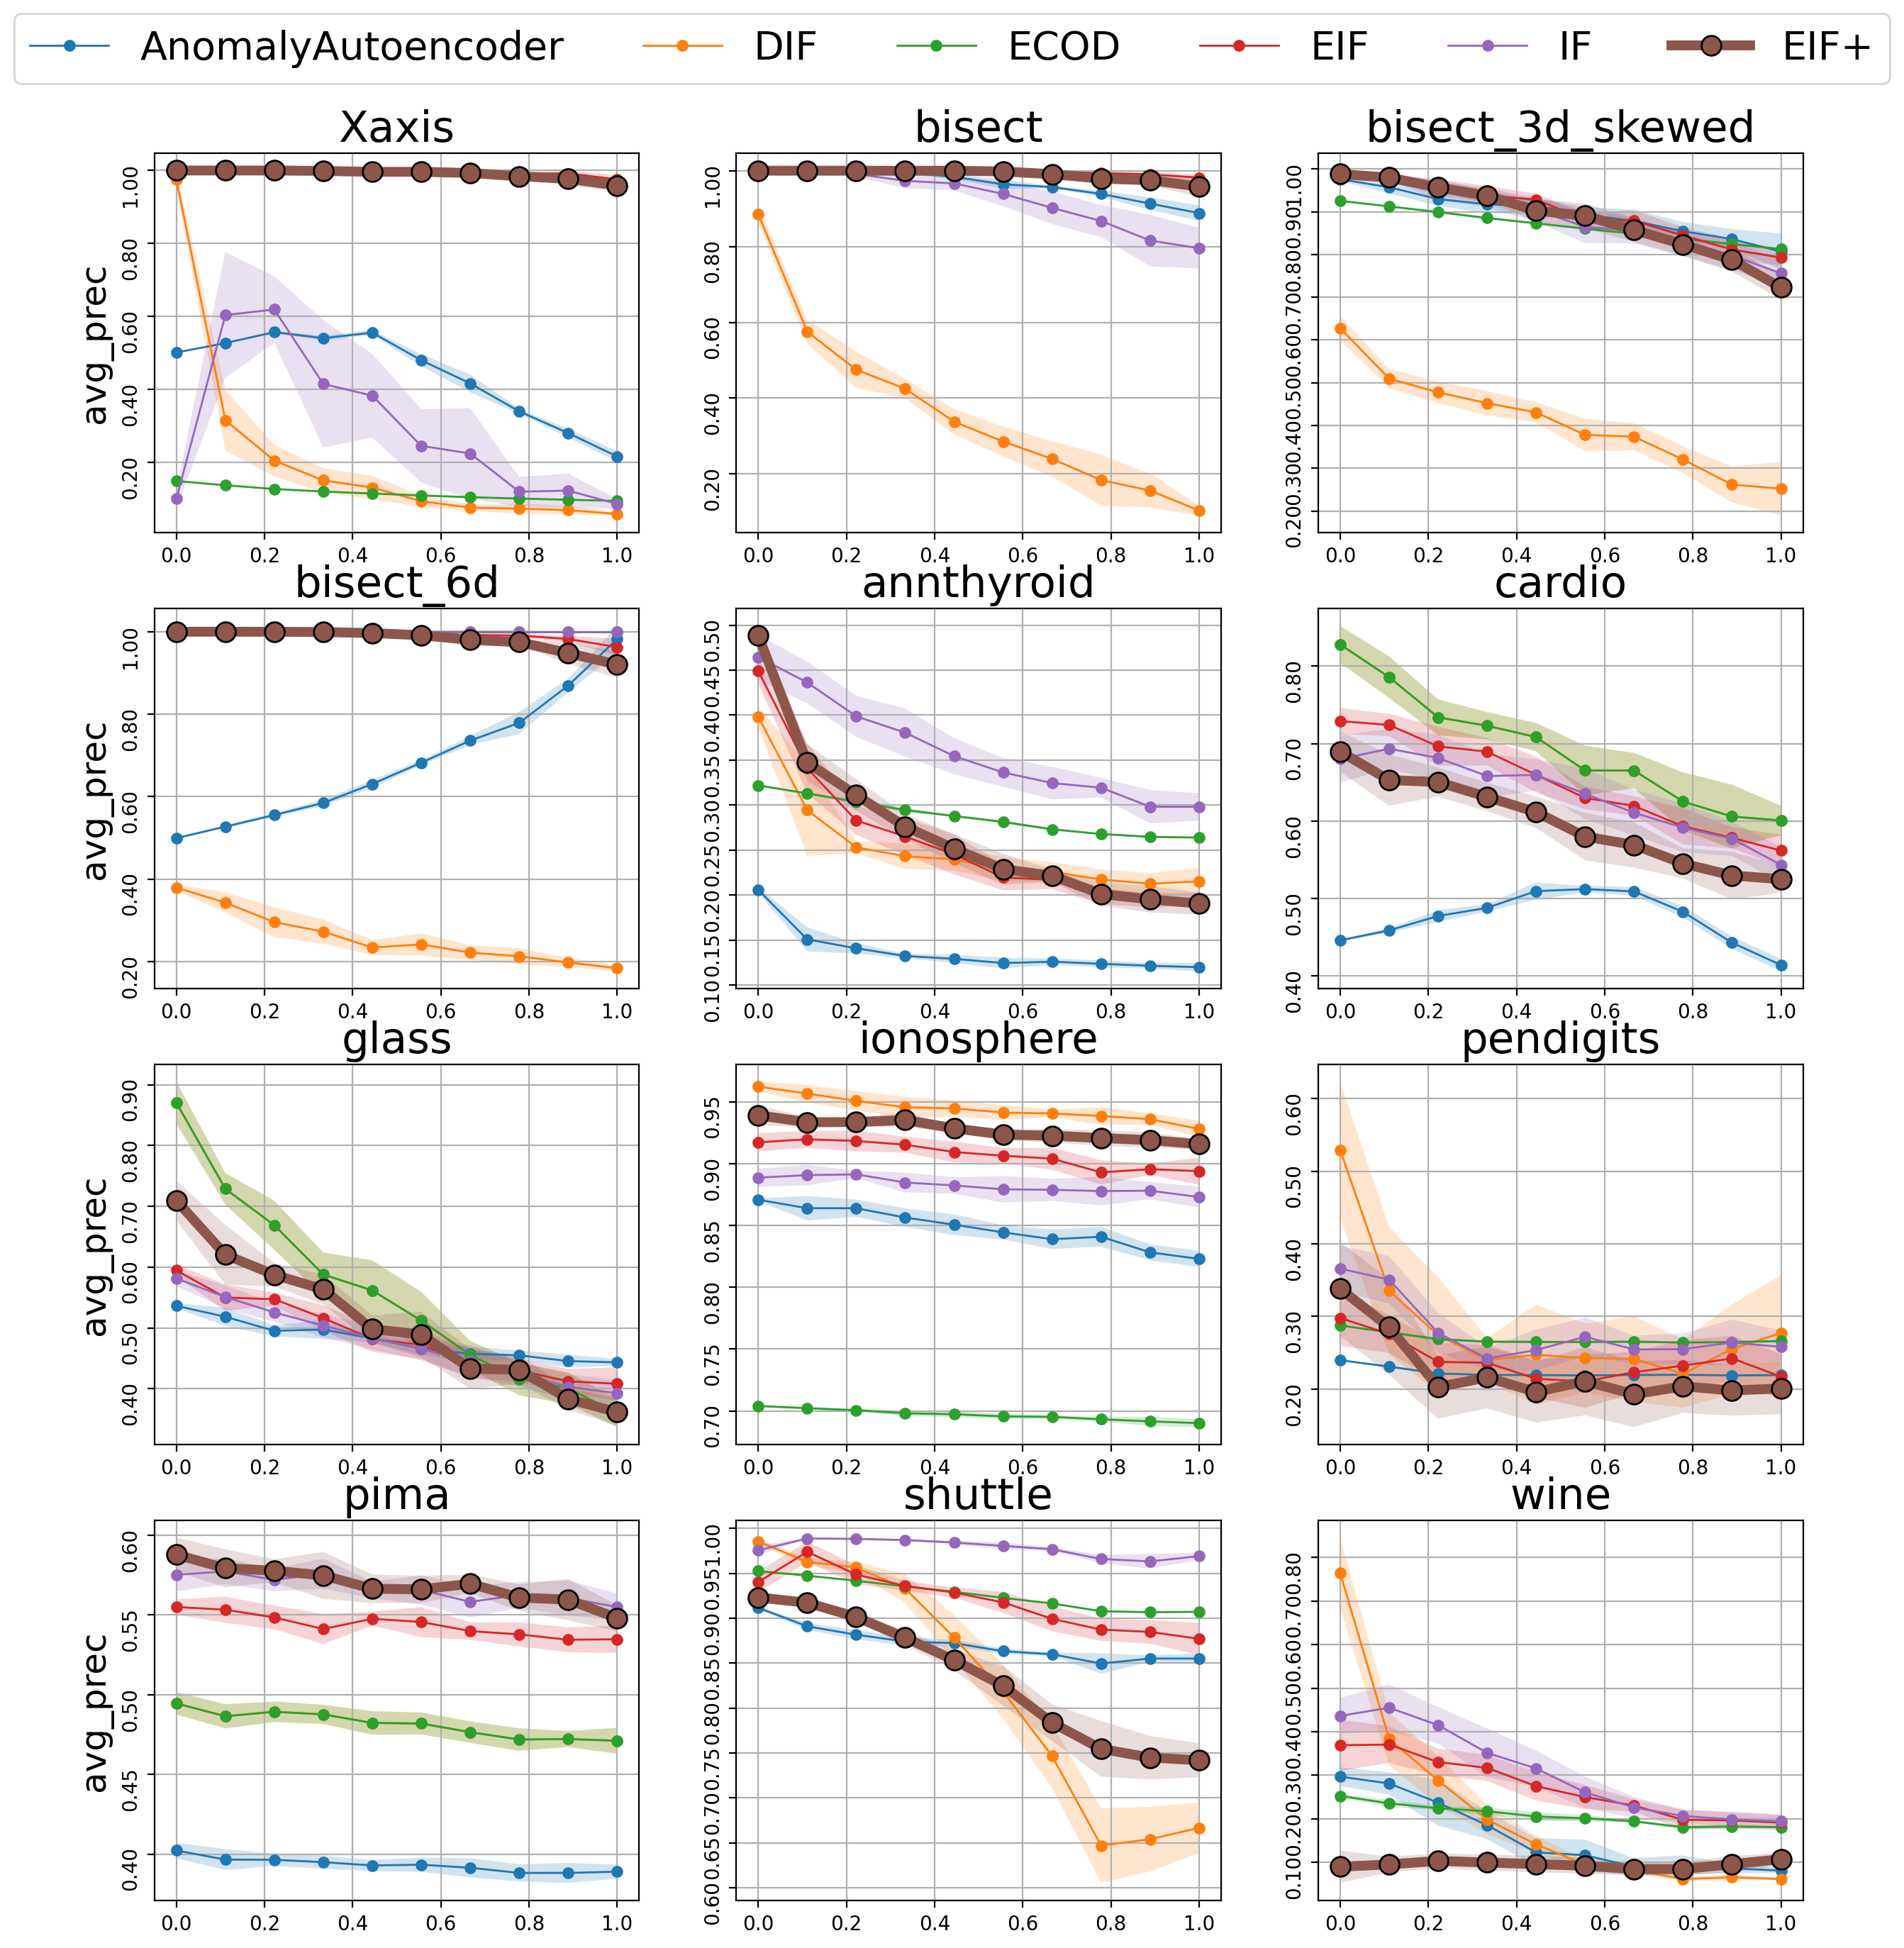

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

contamination = np.linspace(0.0, 1, 10)
plt.rcParams.update({
    'font.size': 16,          # Default font size
    'axes.titlesize': 22,     # Title font size
    'axes.labelsize': 18,     # X and Y labels font size
    'legend.fontsize': 20,    # Legend font size
    'xtick.labelsize': 10,    # X-axis tick labels font size
    'ytick.labelsize': 10,    # Y-axis tick labels font size
    'figure.titlesize': 18    # Figure title font size (if used)
})

metric = "avg_prec"


# Determine the number of rows needed for a two-column layout
unique_datasets = synt_datasets + real_datasets
n_datasets = len(unique_datasets)
n_rows = int(np.ceil(n_datasets / 3))

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4 * n_rows), dpi=200)
axes = axes.flatten()  # Flatten to easily iterate over

handles = []
labels = []

for i, dataset in enumerate(unique_datasets):
    ax = axes[i]
    for model in [model for model in models if model != "EIF+"] + ["EIF+"]:
        for res in results:
            if res[0] == dataset and res[1] == model:
                means = res[2]
                stds = res[3]
        linewidth = 1 if model != "EIF+" else 5
        markersize = 5 if model != "EIF+" else 10
        markeredgecolor=None if model != "EIF+" else "black"
        markeredgewidth=1 if model != "EIF+" else 1
        line, = ax.plot(
            contamination,
            means,
            label=model,
            linewidth=linewidth,
            marker="o",
            markersize=markersize,
            markeredgecolor=markeredgecolor,
            markeredgewidth=markeredgewidth,
        )
        ax.fill_between(
            contamination,
            means - stds,
            means + stds,
            alpha=0.2,
        )
        
        if i == 0:
            handles.append(line)
            labels.append(model)
    if int(i/3) == 4:
        ax.set_xlabel("contamination")
    if i % 3 == 0:
        ax.set_ylabel(metric)
    ax.set_yticklabels(ax.get_yticks(), rotation=90)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_title(dataset)
    #ax.legend()
    ax.grid()

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")
    
fig.legend(handles, labels, loc='upper center', ncol=len(labels), bbox_to_anchor=(0.5, 0.95))


plt.savefig("anomaly_results.pdf", bbox_inches="tight")
plt.show()